<a href="https://colab.research.google.com/github/Binitaaaaaa/simulation/blob/main/SNM_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

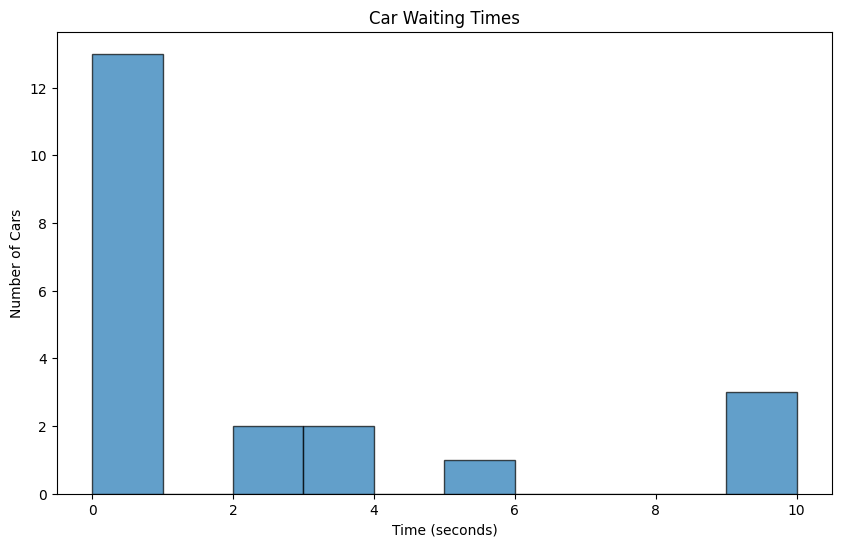

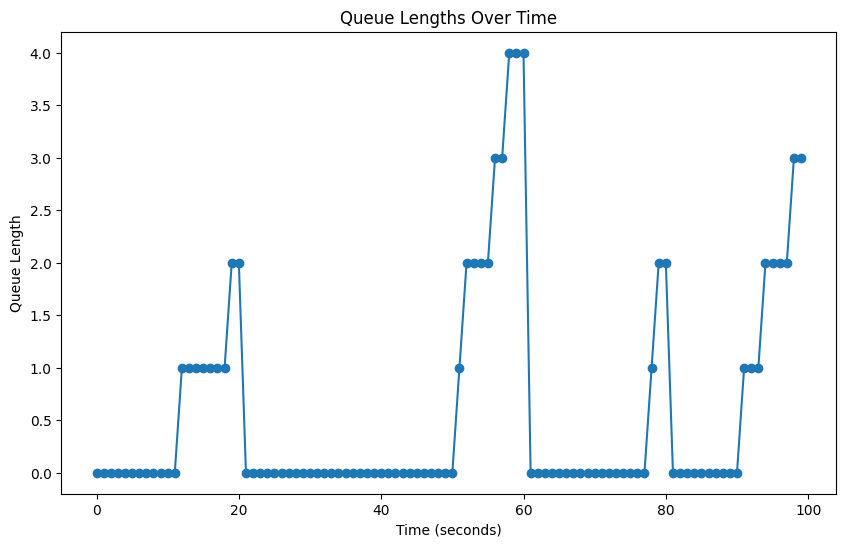

In [2]:
!pip install simpy matplotlib -q
import simpy
import random
import matplotlib.pyplot as plt

# Simulation parameters
SIMULATION_TIME = 100  # Total time to run the simulation
ARRIVAL_RATE = 5  # Average time (seconds) between car arrivals
GREEN_LIGHT_DURATION = 10  # How long the green light lasts
RED_LIGHT_DURATION = 10  # How long the red light lasts

class TrafficLight:
    def __init__(self, env):
        self.env = env
        self.green = True  # Start with green light
        self.process = env.process(self.operate())

    def operate(self):
        """Traffic light cycles between green and red."""
        while True:
            self.green = True  # Light turns green
            yield self.env.timeout(GREEN_LIGHT_DURATION)

            self.green = False  # Light turns red
            yield self.env.timeout(RED_LIGHT_DURATION)

def generate_traffic(env, traffic_light, queue):
    """Generates cars at random intervals."""
    car_id = 0
    while True:
        yield env.timeout(random.expovariate(1 / ARRIVAL_RATE))  # Exponential distribution for arrivals
        car_id += 1
        env.process(car(env, f"Car-{car_id}", traffic_light, queue))

def car(env, name, traffic_light, queue):
    """Represents a car arriving at the intersection."""
    arrival_time = env.now
    queue.append(arrival_time)  # Add to queue

    while not traffic_light.green:  # Wait if the light is red
        yield env.timeout(1)

    # Car leaves the queue when light is green
    wait_time = env.now - arrival_time
    car_wait_times.append(wait_time)
    queue.pop(0)  # Remove from queue

def monitor_queue(env, traffic_light, queue):
    """Monitors queue length over time."""
    while True:
        queue_lengths.append((env.now, len(queue)))
        yield env.timeout(1)  # Record data every second

# Initialize simulation
env = simpy.Environment()
traffic_light = TrafficLight(env)

# Data tracking
queue = []
car_wait_times = []
queue_lengths = []

env.process(generate_traffic(env, traffic_light, queue))
env.process(monitor_queue(env, traffic_light, queue))
env.run(until=SIMULATION_TIME)

# Visualization
def visualize_results():
    # Plot waiting times
    plt.figure(figsize=(10, 6))
    plt.hist(car_wait_times, bins=10, edgecolor="black", alpha=0.7)
    plt.title("Car Waiting Times")
    plt.xlabel("Time (seconds)")
    plt.ylabel("Number of Cars")
    plt.show()

    # Plot queue lengths over time
    times, lengths = zip(*queue_lengths)
    plt.figure(figsize=(10, 6))
    plt.plot(times, lengths, marker="o", linestyle="-")
    plt.title("Queue Lengths Over Time")
    plt.xlabel("Time (seconds)")
    plt.ylabel("Queue Length")
    plt.show()

visualize_results()
